**Checkmark 2021.01.14 BY ETHAN**

# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

/Users/min/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/min/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/min/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/min/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/frame

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
n_samples

17

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
    # JUST ONE WEIGHT W AND ONE BIAS b

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [8]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 50 cost= 0.152517259 W= 0.40330216 b= -0.30430198
Epoch: 100 cost= 0.143787742 W= 0.39416036 b= -0.2385366
Epoch: 150 cost= 0.136066422 W= 0.38556236 b= -0.1766826
Epoch: 200 cost= 0.129237071 W= 0.37747556 b= -0.11850744
Epoch: 250 cost= 0.123196505 W= 0.3698698 b= -0.06379213
Epoch: 300 cost= 0.117853768 W= 0.3627164 b= -0.012331073
Epoch: 350 cost= 0.113128230 W= 0.3559884 b= 0.036069352
Epoch: 400 cost= 0.108948641 W= 0.34966066 b= 0.081591174
Epoch: 450 cost= 0.105251946 W= 0.3437091 b= 0.1244057
Epoch: 500 cost= 0.101982385 W= 0.3381117 b= 0.16467379
Epoch: 550 cost= 0.099090666 W= 0.332847 b= 0.20254706
Epoch: 600 cost= 0.096533105 W= 0.32789558 b= 0.23816757
Epoch: 650 cost= 0.094271146 W= 0.32323867 b= 0.27166954
Epoch: 700 cost= 0.092270590 W= 0.3188585 b= 0.30317965
Epoch: 750 cost= 0.090501361 W= 0.31473902 b= 0.332815
Epoch: 800 cost= 0.088936605 W= 0.3108646 b= 0.36068803
Epoch: 850 cost= 0.087552756 W= 0.30722043 b= 0.38690403
Epoch: 900 cost= 0.086328983 W= 0.303

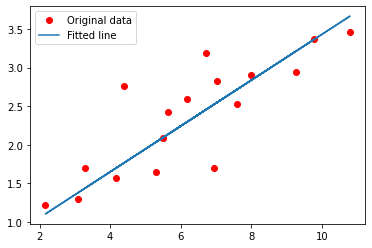

In [10]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%i' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()